In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

df = pd.read_csv("cleaned_primary_school_GDP.csv")
df

,Country,Indicator,Sex,Education Level,Wealth Quintile,Residence,Value,Time,GDP
0,Australia,Proportion of students at the end of primary a...,Female,Primary education,Total,Total,63.93016,2015,47232.62912
1,Australia,Proportion of students at the end of primary a...,Male,Primary education,Total,Total,65.67903,2015,47232.62912
2,Australia,Proportion of students at the end of primary a...,Total,Primary education,Total,Total,68.00000,2019,52669.47390
3,Austria,Proportion of students at the end of primary a...,Total,Primary education,Total,Total,84.00000,2019,58091.27226
4,Austria,Proportion of students at the end of primary a...,Female,Primary education,Total,Total,98.08942,2016,52665.08742
...,...,...,...,...,...,...,...,...,...
424,South Africa,Out-of-school rate for children of primary sch...,Total,Primary education,Total,ural,1.10000,2016,12827.60358
425,South Africa,Out-of-school rate for children of primary sch...,Total,Primary education,Total,rban,1.00000,2016,12827.60358
426,South Africa,Out-of-school rate for children of primary sch...,Total,Primary education,Total,Total,1.00000,2016,12827.60358
427,South Africa,Proportion of students at the end of primary a...,Total,Primary education,Total,Total,14.90000,2013,12616.60638


In [67]:
#What is the relationship between wealth quintiles  and the percentage of out-of-school students?

df2 = df[df['Indicator'] == 'Out-of-school rate for children of primary school age']

df2.drop(df2[df2['Wealth Quintile']  == "Total"].index, inplace = True)

df2.loc[df2['Wealth Quintile'] == "Lowest", 'Wealth Quintile'] = 1
df2.loc[df2['Wealth Quintile'] == "Second", 'Wealth Quintile'] = 2
df2.loc[df2['Wealth Quintile'] == "Middle", 'Wealth Quintile'] = 3
df2.loc[df2['Wealth Quintile'] == "Fourth", 'Wealth Quintile'] = 4
df2.loc[df2['Wealth Quintile'] == "Highest", 'Wealth Quintile'] = 5

df2['Wealth Quintile'] = df2['Wealth Quintile'].astype(int)

df3 = df2.groupby(['Country','Wealth Quintile']).sum().reset_index()
df3.rename(columns = {'Value':'Percentage'}, inplace = True)
df3




,Country,Wealth Quintile,Percentage,Time,GDP
0,Brazil,1,0.680840,2019,15422.748590
1,Brazil,2,0.570422,2019,15422.748590
2,Brazil,3,0.451238,2019,15422.748590
3,Brazil,4,0.086456,2019,15422.748590
4,Brazil,5,0.274431,2019,15422.748590
5,Colombia,1,2.551666,2015,13330.562040
6,Colombia,2,2.198711,2015,13330.562040
7,Colombia,3,1.488963,2015,13330.562040
8,Colombia,4,1.192265,2015,13330.562040
9,Colombia,5,1.696648,2015,13330.562040


(0.0, 13.244339538196815)

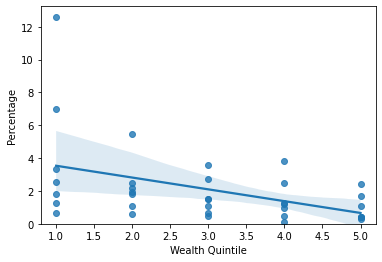

In [68]:
sns.regplot(x="Wealth Quintile", y="Percentage", data=df3)
plt.ylim(0,)

#sns.regplot(x="Value", y="Wealth Quintile", data=df3)
#plt.ylim(0,)